In [1]:
import seaborn as sns

# Exploratory Data Analysis (EDA)


### 8. Load the Titanic dataset and perform univariate and bivariate analysis on numerical and categorical features.

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# univariate Analysis
print(round(df['fare'].mean(),4) , df['sex'].mode()[0] , df['embark_town'].mode()[0])

32.2042 male Southampton


In [9]:
## Bivariate Analysis

df1 = df.groupby('embark_town')['fare'].mean()
df1.head()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

### 9. Identify and visualize outliers using boxplots and z-score analysis.

In [14]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df2 = df.copy()
df2['fare'] = std.fit_transform(df2[['fare']])

In [22]:
# identification of outliers using z score analysis
print(df['fare'].var() , df['fare'].mean() ,'\n', round(df2['fare'].var(),2) , round(df2['fare'].mean(),2))

2469.436845743117 32.204207968574636 
 1.0 0.0


In [ ]:
## any data points which lie outside mean+- 3var   would be considerd as outlier


outliers = df2['fare'][(df2['fare'] > 3) | (df2['fare'] < - 3 )]
outliers

27     4.647001
88     4.647001
118    4.335332
258    9.667167
299    4.335332
311    4.634417
341    4.647001
377    3.610065
380    3.932723
438    4.647001
527    3.817033
557    3.932723
679    9.667167
689    3.606793
700    3.932723
716    3.932723
730    3.606793
737    9.667167
742    4.634417
779    3.606793
Name: fare, dtype: float64

<Axes: ylabel='fare'>

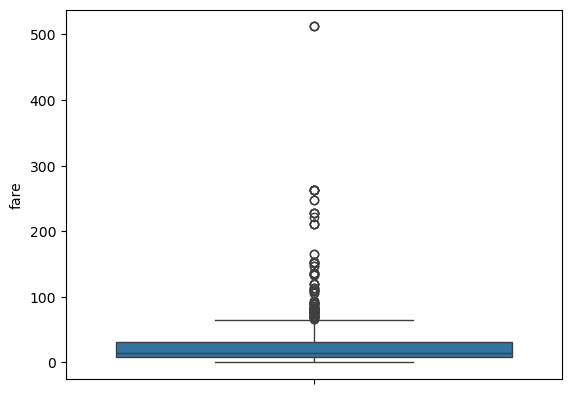

In [4]:

sns.boxplot(data=df['fare'])
# Using Z-Score detect Outlier 
# Sample data = [10,12,11,13,100,12,11,13] where z>3

### 10. Display the correlation matrix and visually interpret relationships using seaborn.heatmap().




In [23]:
# Take 'iris' dataset as sample [load_dataset('iris')]
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
import pandas as pd

In [27]:
## have to do a encoding first to categorical variable 
iris2 = pd.get_dummies(iris)
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [28]:
matrix = iris2.corr()
matrix

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
species_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
species_versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
species_virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


<Axes: >

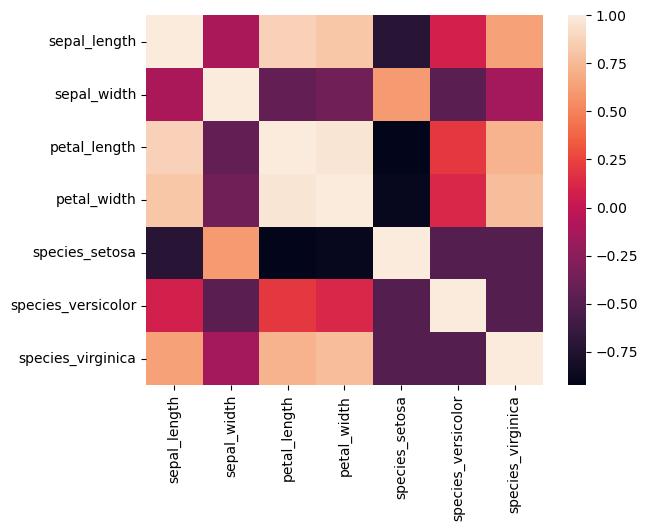

In [29]:
sns.heatmap(matrix)

### 11. Compute and interpret mean, median, mode, variance, and standard deviation for a given dataset.

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# lets compute it based on out 1st titanic dataset only
print('mean of fare is',df['fare'].mean())
print('median of fare is',df['fare'].median())
print('mode of fare is',df['fare'].mode()[0])
print('variance of fare is',df['fare'].var())
print('standard deviation of fare is',(df['fare'].var())**0.5)

mean of fare is 32.204207968574636
median of fare is 14.4542
mode of fare is 8.05
variance of fare is 2469.436845743117
standard deviation of fare is 49.693428597180905


### 12. Load a dataset with missing values. Demonstrate imputation using mean, median, and mode techniques.

In [47]:
Sample_Data =  {'A':[1,None,3,5], 'B':[None,None,2,6], 'C':[1,2,None,4],'D':[3,None,10,12],'E':[12,45,90,1]}
misdata = pd.DataFrame(Sample_Data)
misdata

,A,B,C,D,E
0,1.0,NaN,1.0,3.0,12
1,NaN,NaN,2.0,NaN,45
2,3.0,2.0,NaN,10.0,90
3,5.0,6.0,4.0,12.0,1


In [50]:
mean_misdata = misdata.fillna(misdata.mean())
median_misdata = misdata.fillna(misdata.median())
#mode_misdata = misdata.fillna(misdata.mode()[0])
print(mean_misdata,'\n\n' , median_misdata ,'\n\n' )

     A    B         C          D   E
0  1.0  4.0  1.000000   3.000000  12
1  3.0  4.0  2.000000   8.333333  45
2  3.0  2.0  2.333333  10.000000  90
3  5.0  6.0  4.000000  12.000000   1 

      A    B    C     D   E
0  1.0  4.0  1.0   3.0  12
1  3.0  4.0  2.0  10.0  45
2  3.0  2.0  2.0  10.0  90
3  5.0  6.0  4.0  12.0   1 




In [53]:
misdata_mode = misdata.copy()
for column in misdata_mode.columns:
    mode_value = misdata_mode[column].mode()[0] # .mode() can return multiple values if there's a tie, so we take the first one
    misdata_mode[column].fillna(mode_value, inplace=True)

print("DataFrame after replacing NaN with mode:")
display(misdata_mode)

DataFrame after replacing NaN with mode:


C:\Users\HP\AppData\Local\Temp\ipykernel_28156\790248626.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  misdata_mode[column].fillna(mode_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_28156\790248626.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

,A,B,C,D,E
0,1.0,2.0,1.0,3.0,12
1,1.0,2.0,2.0,3.0,45
2,3.0,2.0,1.0,10.0,90
3,5.0,6.0,4.0,12.0,1


### 13. Write a custom function that removes rows where more than 30% of data is missing.

In [43]:
Sample_Data =  {'A':[1,None,3,5], 'B':[None,None,2,6], 'C':[1,2,None,4],'D':[3,None,10,12]}
df3 = pd.DataFrame(Sample_Data)
df3
## Row no. B will be dropped in this case.

,A,B,C,D
0,1.0,NaN,1.0,3.0
1,NaN,NaN,2.0,NaN
2,3.0,2.0,NaN,10.0
3,5.0,6.0,4.0,12.0


In [40]:
len(df3['B'])

3

In [44]:
drop_columns = []
for column in df3.columns:
    if df3[column].isna().sum()>(0.3*len(df3[column])):
        drop_columns.append(column)
print(drop_columns)

['B']


In [46]:
df3 = df3.drop(columns=drop_columns)
df3

,A,C,D
0,1.0,1.0,3.0
1,NaN,2.0,NaN
2,3.0,NaN,10.0
3,5.0,4.0,12.0
